In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train=pd.read_csv("cs-training.csv").drop(['Unnamed: 0'],axis=1)
test=pd.read_csv("cs-test.csv").drop(['Unnamed: 0'],axis=1)

In [3]:
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
test

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [5]:
train.shape

(150000, 11)

In [6]:
train.duplicated().sum()

609

In [7]:
train_redup=train.drop_duplicates()

In [8]:
train_redup.shape

(149391, 11)

In [9]:
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [10]:
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [11]:
train_redup[train_redup.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [12]:
train_redup[train_redup.NumberOfDependents.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,0.0,3828.000000,3828.000000,3828.000000,3828.000000,0.0
mean,0.046499,11.003369,59.741641,0.572623,1110.713689,NaN,5.708986,0.497126,0.605799,0.474138,NaN
std,0.210592,240.656436,18.345175,6.527320,4235.410634,NaN,4.086337,6.523199,0.920990,6.520343,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.009228,48.000000,0.000000,25.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047670,61.000000,0.000000,398.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.259028,74.000000,0.000000,1587.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [13]:
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [14]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]

In [15]:
fam_miss.shape

(3828, 11)

In [16]:
fam_nmiss.shape

(145563, 11)

In [17]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

C:\Users\DELL.DESKTOP-HLAN3B4\AppData\Local\Temp\ipykernel_29784\693308875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
C:\Users\DELL.DESKTOP-HLAN3B4\AppData\Local\Temp\ipykernel_29784\693308875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [18]:
findMiss(fam_miss)


SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [19]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [20]:
fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [21]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

C:\Users\DELL.DESKTOP-HLAN3B4\AppData\Local\Temp\ipykernel_29784\100680096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [22]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [23]:
import pandas as pd
# Assuming fam_nmiss and fam_miss are DataFrames
filled_train = pd.concat([fam_nmiss, fam_miss])

In [24]:
findMiss(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [25]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [26]:
filled_train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [27]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In [28]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()    

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [29]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([0.99])

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [30]:
filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>1].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    2084
1    1237
dtype: int64

In [31]:
util_droped=filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10].index)

In [32]:
filled_train.shape


(149391, 11)

In [33]:
util_droped.shape

(149150, 11)

<Axes: >

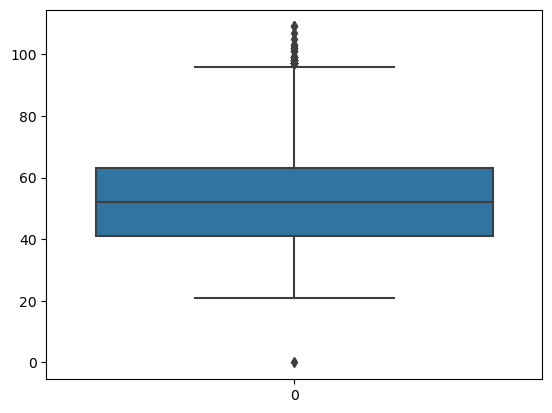

In [34]:
sns.boxplot(util_droped['age'])

In [35]:
util_droped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [36]:
util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [37]:
util_droped[util_droped['NumberOfTime60-89DaysPastDueNotWorse']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

<Axes: xlabel='DebtRatio', ylabel='Density'>

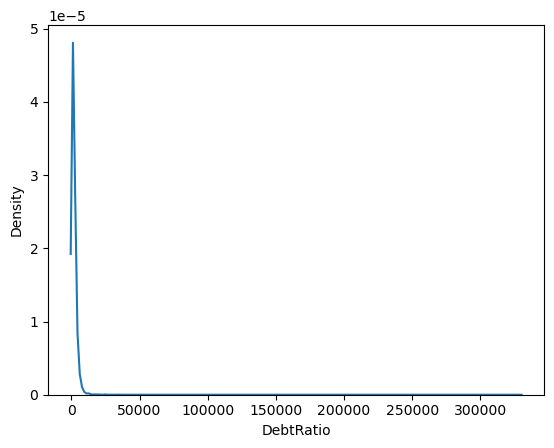

In [38]:
sns.kdeplot(util_droped['DebtRatio'])

In [39]:
util_droped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

In [40]:
util_droped['DebtRatio'].quantile([0.97])

0.97    3229.53
Name: DebtRatio, dtype: float64

In [41]:
util_droped[util_droped['DebtRatio']>3500].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    3465
1     240
dtype: int64

In [42]:
dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])].index)

In [43]:
dRatio

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.000000,0.0,13,0,1,0,0.0
149854,0,0.056589,75,0,8.000000,0.0,3,0,0,0,0.0
149894,0,0.017904,55,0,1058.000000,0.0,8,0,1,1,0.0
149948,0,0.055530,27,0,10.000000,0.0,1,0,0,0,0.0


negative: 138778
positive: 9990


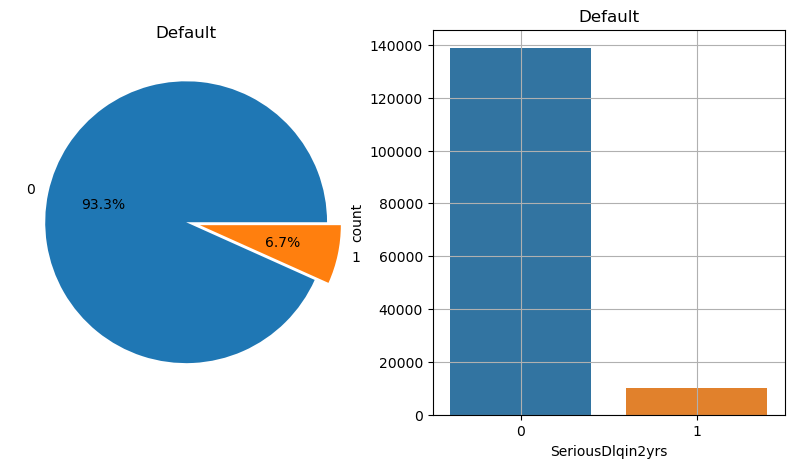

In [44]:
f,ax=plt.subplots(1,2,figsize=(10,5))
dRatio['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],ax=ax[0],autopct='%1.1f%%')
ax[0].set_title('Default')
ax[0].set_ylabel('')
sns.countplot(x='SeriousDlqin2yrs',data=dRatio,ax=ax[1])
ax[1].set_title('Default')
n,p=dRatio['SeriousDlqin2yrs'].value_counts()
print('negative:',n)
print('positive:',p)
plt.grid()
plt.show()

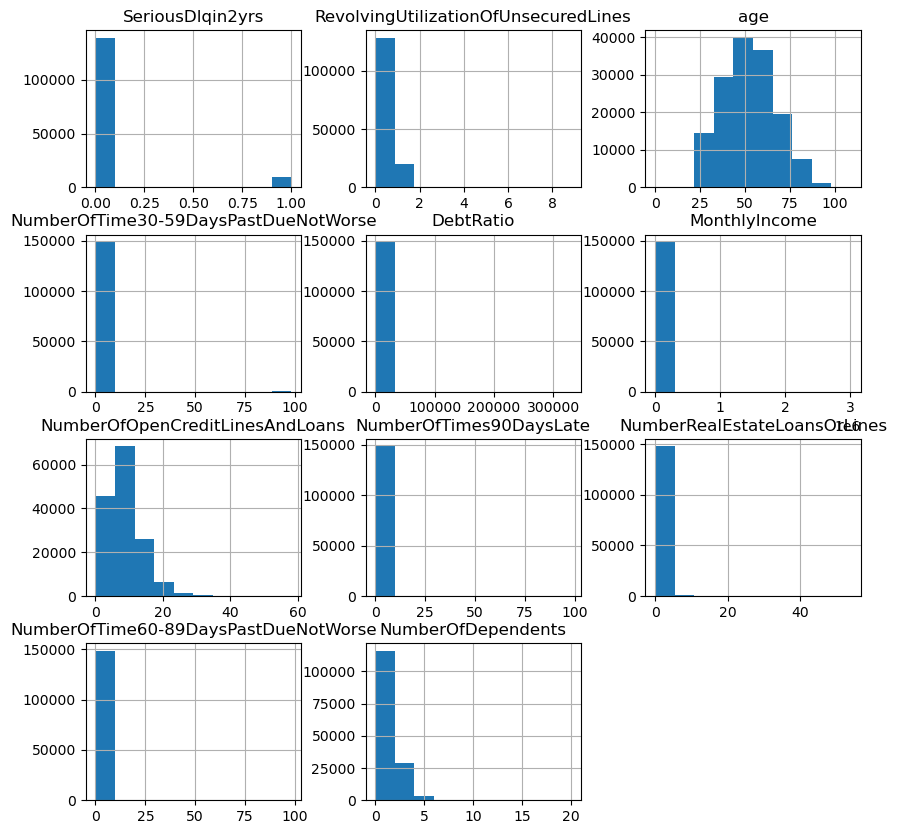

In [45]:
dRatio.hist(figsize=(10,10))
plt.show()

array([[<Axes: xlabel='SeriousDlqin2yrs', ylabel='SeriousDlqin2yrs'>,
        <Axes: xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='SeriousDlqin2yrs'>,
        <Axes: xlabel='age', ylabel='SeriousDlqin2yrs'>,
        <Axes: xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='SeriousDlqin2yrs'>,
        <Axes: xlabel='DebtRatio', ylabel='SeriousDlqin2yrs'>,
        <Axes: xlabel='MonthlyIncome', ylabel='SeriousDlqin2yrs'>,
        <Axes: xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='SeriousDlqin2yrs'>,
        <Axes: xlabel='NumberOfTimes90DaysLate', ylabel='SeriousDlqin2yrs'>,
        <Axes: xlabel='NumberRealEstateLoansOrLines', ylabel='SeriousDlqin2yrs'>,
        <Axes: xlabel='NumberOfTime60-89DaysPastDueNotWorse', ylabel='SeriousDlqin2yrs'>,
        <Axes: xlabel='NumberOfDependents', ylabel='SeriousDlqin2yrs'>],
       [<Axes: xlabel='SeriousDlqin2yrs', ylabel='RevolvingUtilizationOfUnsecuredLines'>,
        <Axes: xlabel='RevolvingUtilizationOfUnsecuredLines', ylab

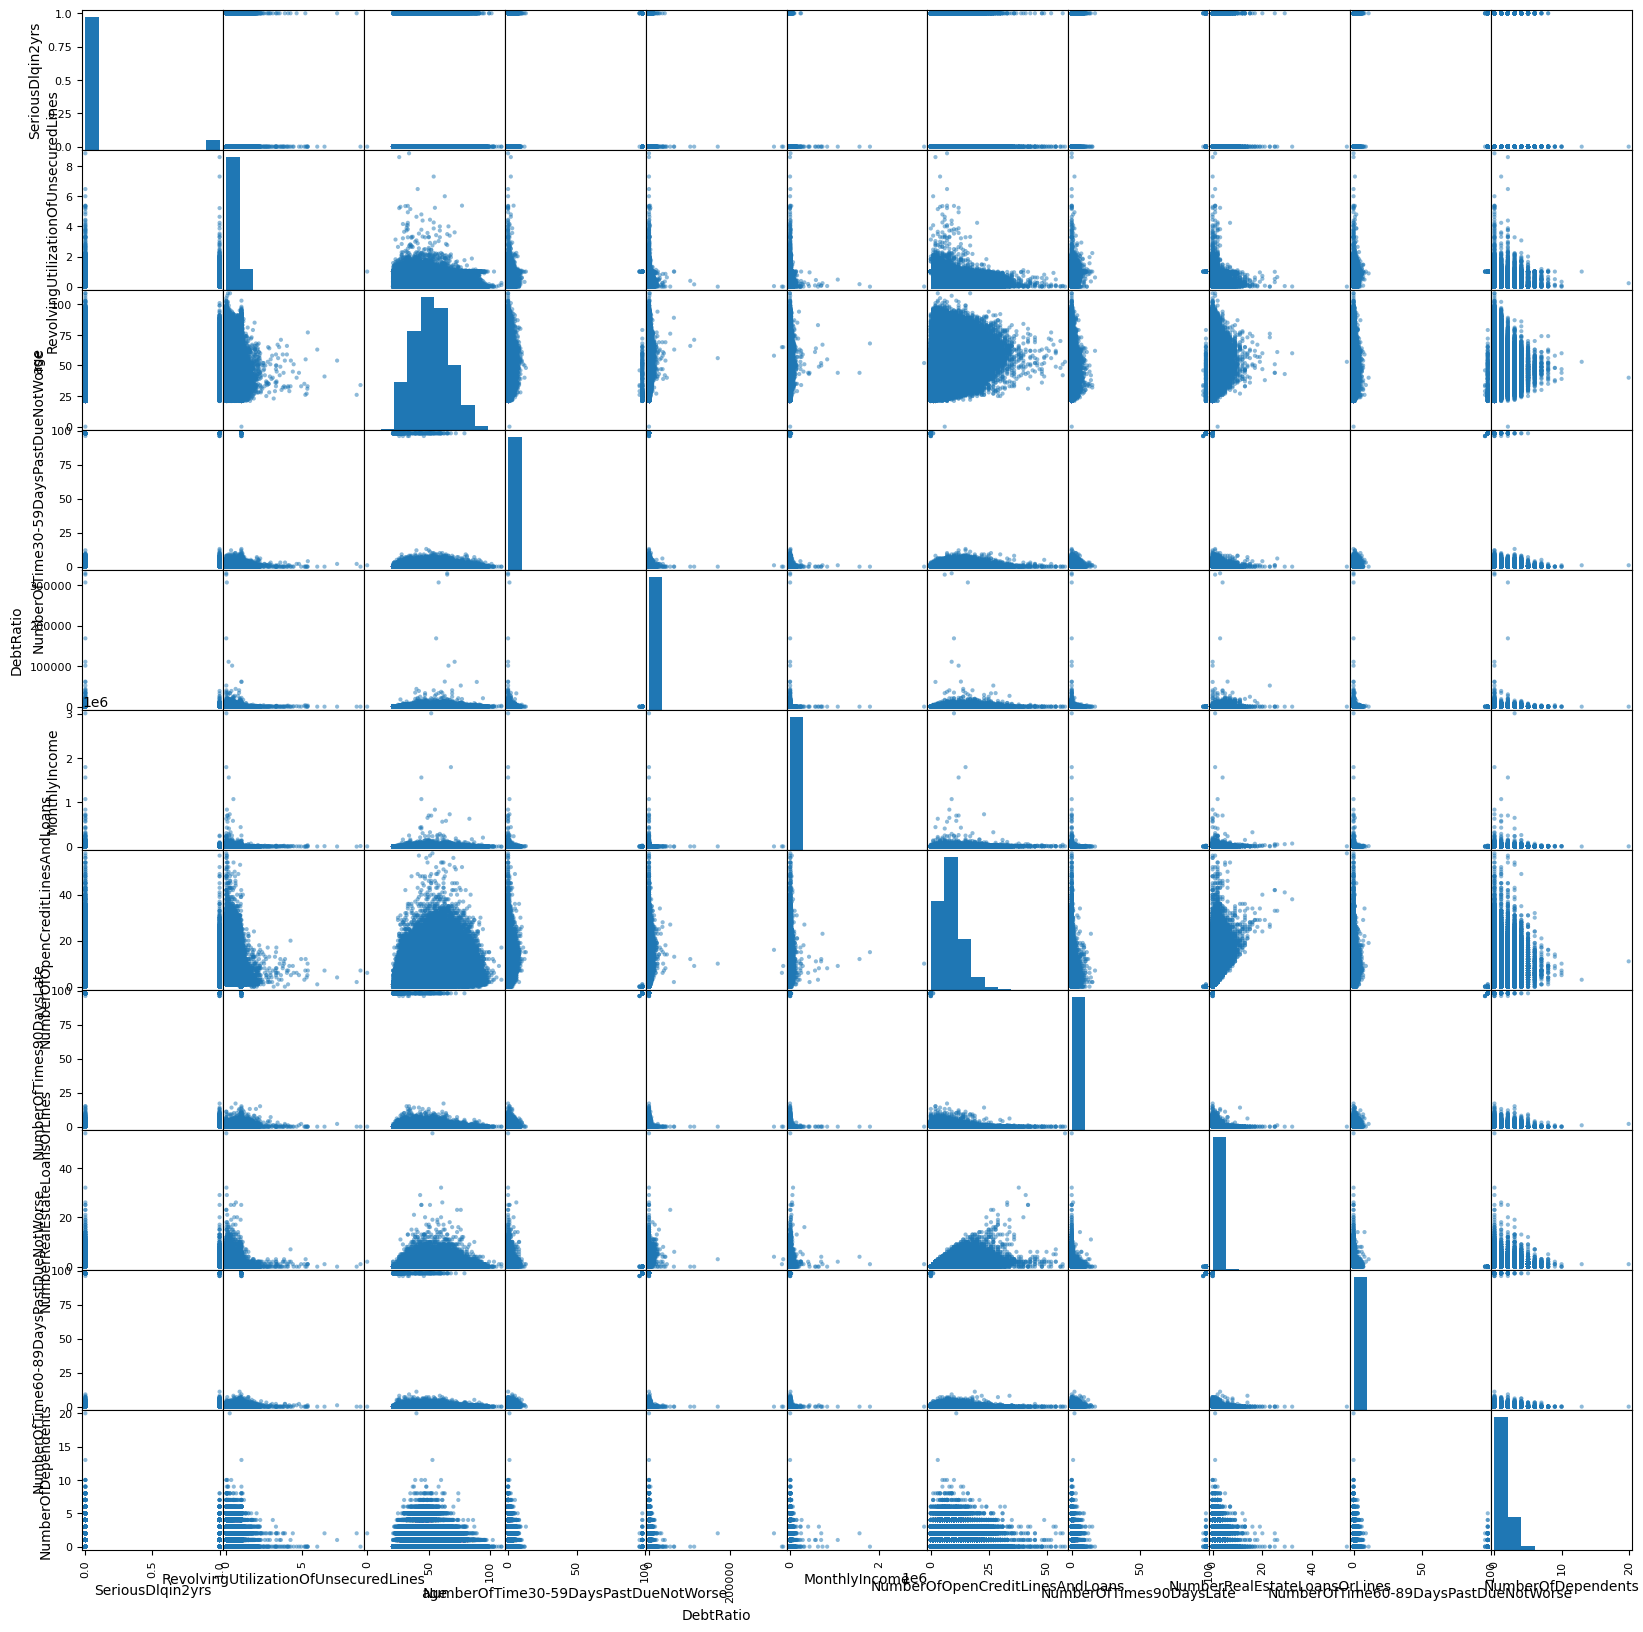

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(dRatio,figsize=(20,20))

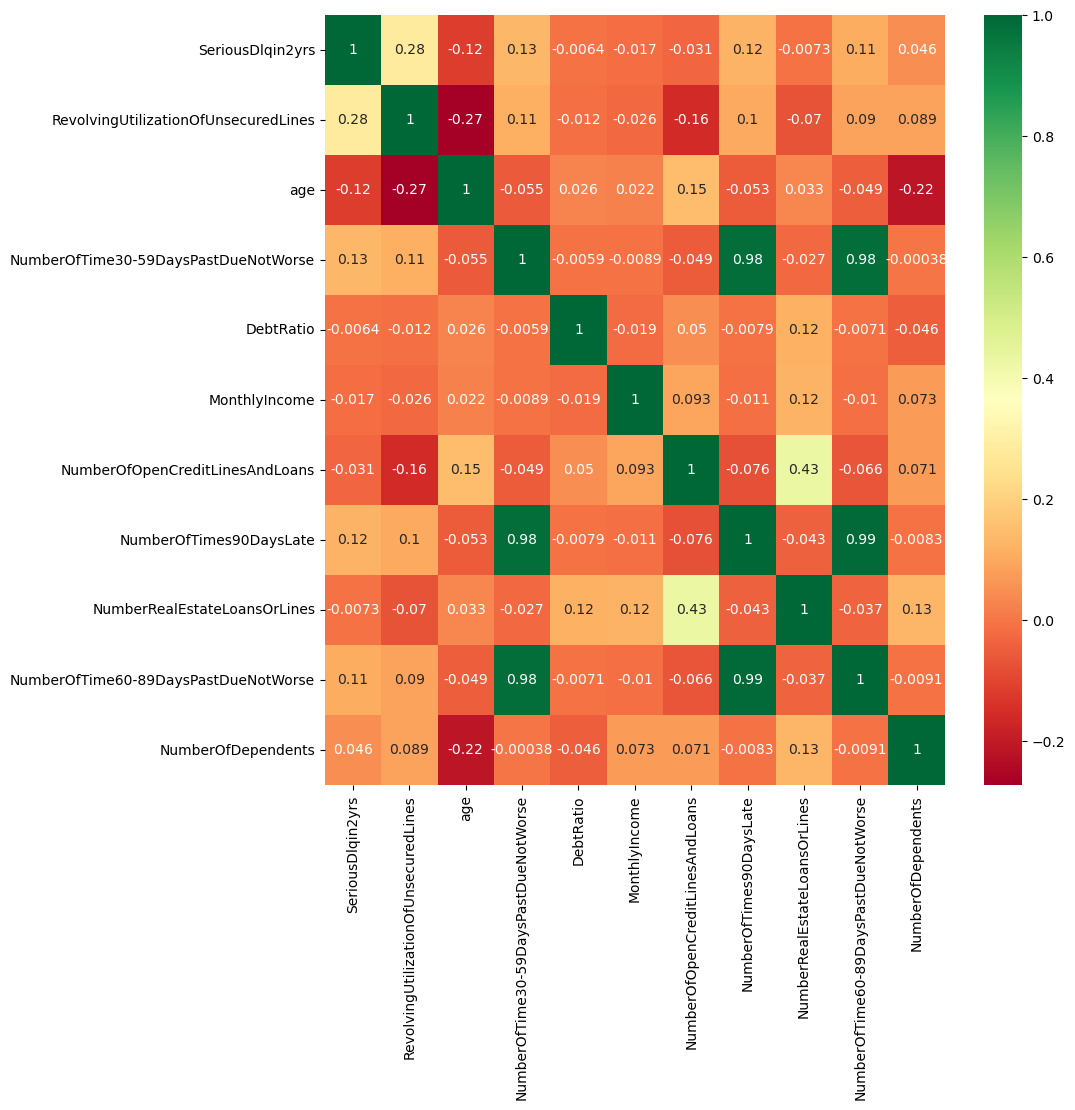

In [49]:
import seaborn as sns
corrmat=dRatio.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(dRatio[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
corr=dRatio.corr()
corr

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.283278,-0.115803,0.131530,-0.006398,-0.016595,-0.030645,0.122481,-0.007317,0.106232,0.046416
RevolvingUtilizationOfUnsecuredLines,0.283278,1.000000,-0.272570,0.114766,-0.011715,-0.026068,-0.155562,0.103414,-0.069513,0.089609,0.089461
age,-0.115803,-0.272570,1.000000,-0.055264,0.025792,0.021842,0.147269,-0.053035,0.032779,-0.048793,-0.217340
NumberOfTime30-59DaysPastDueNotWorse,0.131530,0.114766,-0.055264,1.000000,-0.005926,-0.008905,-0.048924,0.980538,-0.027011,0.984578,-0.000379
DebtRatio,-0.006398,-0.011715,0.025792,-0.005926,1.000000,-0.019485,0.049919,-0.007890,0.118817,-0.007124,-0.045615
MonthlyIncome,-0.016595,-0.026068,0.021842,-0.008905,-0.019485,1.000000,0.092648,-0.011447,0.120959,-0.010084,0.072726
NumberOfOpenCreditLinesAndLoans,-0.030645,-0.155562,0.147269,-0.048924,0.049919,0.092648,1.000000,-0.075696,0.432014,-0.065941,0.071128
NumberOfTimes90DaysLate,0.122481,0.103414,-0.053035,0.980538,-0.007890,-0.011447,-0.075696,1.000000,-0.042869,0.991446,-0.008297
NumberRealEstateLoansOrLines,-0.007317,-0.069513,0.032779,-0.027011,0.118817,0.120959,0.432014,-0.042869,1.000000,-0.036866,0.128395
NumberOfTime60-89DaysPastDueNotWorse,0.106232,0.089609,-0.048793,0.984578,-0.007124,-0.010084,-0.065941,0.991446,-0.036866,1.000000,-0.009051


In [60]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [73]:
model = XGBClassifier(tree_method='hist')


In [74]:
x = dRatio.drop(['SeriousDlqin2yrs'],axis=1)
y = dRatio['SeriousDlqin2yrs']

In [75]:

model.fit(x, y.values.ravel())
y_pred = model.predict(x)


In [76]:
accuracy_score(y,y_pred)

0.9462854915035491

In [77]:
cm = confusion_matrix(y,y_pred)

In [83]:
from sklearn.metrics import classification_report



print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138778
           1       0.77      0.28      0.42      9990

    accuracy                           0.95    148768
   macro avg       0.86      0.64      0.69    148768
weighted avg       0.94      0.95      0.93    148768

